In [53]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn_pandas import DataFrameMapper, cross_val_score # sklearn_pandas intermediary
import pandas as pd 
import numpy as np
import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from itertools import groupby
%matplotlib inline

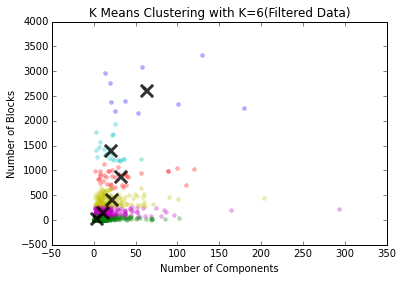

Done!


In [50]:
data = pd.DataFrame.from_csv('omit/ai2_data.csv', 0, 
                             ',',0,True, None, False, False)

#Data Filtering
data = data[data.num_blocks<5000] #removing 3 outlier projects

cols_data = data[['num_components','num_blocks']]
# print cols_data
X = np.array(cols_data)

for num_clusters in range(6,7):
    plt.figure() #clears plot
    kmeans = KMeans(n_clusters=num_clusters) #if n>6, need to add to COLORS
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    # print(centroids)
    # print(labels)

    #Plotting
    COLORS = ["g.","r.","b.","y.","m.","c."][0:num_clusters+1]

    for i in range(len(X)):
    #     print("coordinate:",X[i], "label:", labels[i])
        plt.plot(X[i][0], X[i][1], COLORS[labels[i]], markersize = 8, alpha = 0.3)

    plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 3, zorder = 10, alpha=0.8, color="black")
    plt.xlabel("Number of Components")
    plt.ylabel("Number of Blocks")
    plt.title("K Means Clustering with K=" + str(num_clusters) + "(Filtered Data)")
    
    filename = 'k_'+str(num_clusters)+'.png'
    plt.savefig("k_means_plots/components_to_blocks/filtered/"+filename, dpi=300, figsize=(8,10))
    
    plt.show()
print "Done!"

In [59]:
kmeans = KMeans(n_clusters=3) #if n>6, need to add to COLORS
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
count = [len(list(group)) for key, group in groupby(labels)]

count = 1;
for val in labels:
    if val==0:
        count+=1

print len(labels)
print count

5225
5090
